# Klassifikation Kletterschuhe


## Daten

Eigene Datenerhebung mittels Online-Umfrage: https://forms.gle/PTs57af6sLqk32Wx7

Die Daten wurden getrennt in User-Daten und Schuhe

body_features.csv: Enthält alle Informationen rund um die Person (Geschlecht, Größe, Gewicht, Fußform, Fußmaße, Klettererfahrung)

shoe_survey.csv: Sämtliche von den Personen eingetragene Kletterschuhe (Marke, Modell, Eigenschaften, Bewertungen, etc.)



## Ziel: Schuhmodell vorhersagen

Kann mithilfe der Erfahrungsberichte und Körpereigenschaften der Befragten ein Kletterschuh vorhergesagt werden?

Target Label: shoe_model

# Explorative Analyse

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## body_features

In [215]:
users = pd.read_csv('./data/body_features.csv')

In [216]:
users.head(3)

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
0,1,Männlich,168,61,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,Vans Authentic,4.0
1,2,Weiblich,168,63,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,Adidas cloudfoam,3.0
2,3,Männlich,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0


In [217]:
users.tail(2)

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
92,93,Weiblich,158,53,31,21.5,8.7,Griechischer Fußtyp,Nein,36.0,Sketchers,2.0
93,94,Männlich,191,92,60,29.4,11.0,Griechischer Fußtyp,"Hallux Valgus, Senkfuß",46.5,NaN,23.0


In [218]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userid             94 non-null     int64  
 1   gender             94 non-null     object 
 2   height             94 non-null     int64  
 3   weight             94 non-null     int64  
 4   age                94 non-null     int64  
 5   foot_len           94 non-null     float64
 6   foot_width         94 non-null     float64
 7   foot_family        94 non-null     object 
 8   foot_deform        94 non-null     object 
 9   street_shoe_size   94 non-null     float64
 10  fav_sneaker_model  81 non-null     object 
 11  exp                94 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 8.9+ KB


In [219]:
users.columns

Index(['userid', 'gender', 'height', 'weight', 'age', 'foot_len', 'foot_width',
       'foot_family', 'foot_deform', 'street_shoe_size', 'fav_sneaker_model',
       'exp'],
      dtype='object')

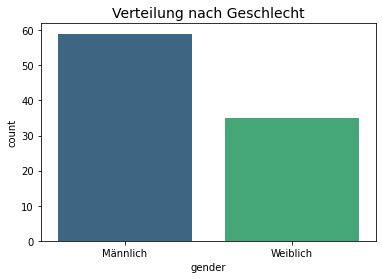

In [220]:
sns.countplot(x='gender', data=users, palette='viridis')
plt.title("Verteilung nach Geschlecht", fontsize=14)
plt.show()

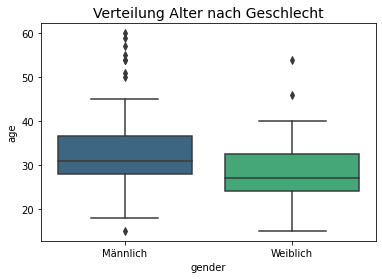

In [221]:
sns.boxplot(x='gender', y='age', data=users, palette='viridis')
plt.title("Verteilung Alter nach Geschlecht", fontsize=14)
plt.show()

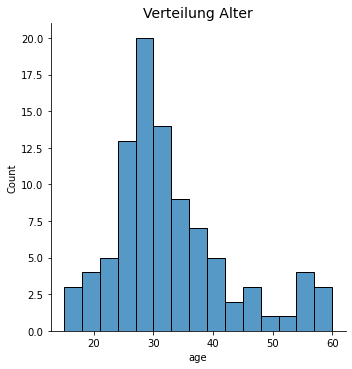

In [222]:
sns.displot(x='age', data=users, bins=15)
plt.title("Verteilung Alter", fontsize=14)
plt.show()

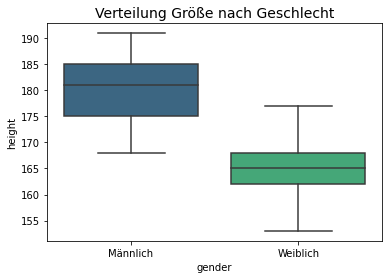

In [223]:
sns.boxplot(x='gender', y='height', data=users, palette='viridis')
plt.title("Verteilung Größe nach Geschlecht", fontsize=14)
plt.show()

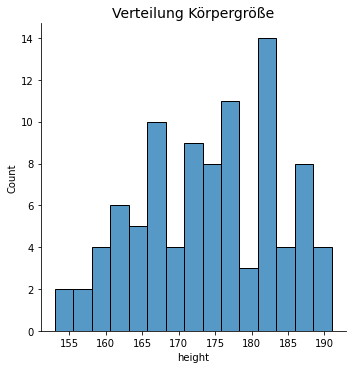

In [224]:
sns.displot(x='height', data=users, bins=15)
plt.title("Verteilung Körpergröße", fontsize=14)
plt.show()

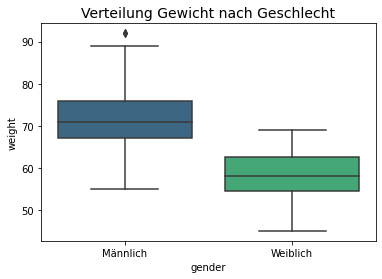

In [225]:
sns.boxplot(x='gender', y='weight', data=users, palette='viridis')
plt.title("Verteilung Gewicht nach Geschlecht", fontsize=14)
plt.show()

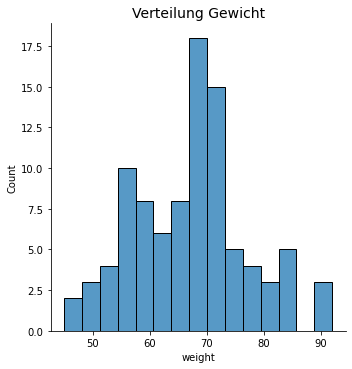

In [226]:
sns.displot(x='weight', data=users, bins=15)
plt.title("Verteilung Gewicht", fontsize=14)
plt.show()

In [227]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp               43
Römischer Fußtyp                 30
Griechischer Fußtyp              20
Mix aus Römisch und Ägyptisch     1
Name: foot_family, dtype: int64

In [228]:
users[users['foot_family'] == 'Mix aus Römisch und Ägyptisch']

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
13,14,Weiblich,164,58,24,23.0,8.3,Mix aus Römisch und Ägyptisch,Senkfuß,38.0,Nike,3.0


In [229]:
users.at[13,'foot_family'] = 'Ägyptischer Fußtyp'

In [230]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp     44
Römischer Fußtyp       30
Griechischer Fußtyp    20
Name: foot_family, dtype: int64

<AxesSubplot:>

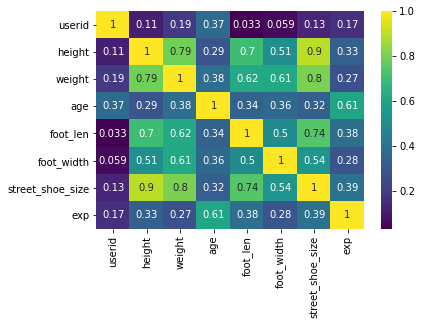

In [231]:
sns.heatmap(users.corr(), cmap='viridis', annot=True)

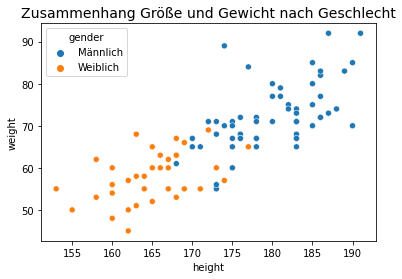

In [232]:
sns.scatterplot(x='height', y='weight', data=users, hue='gender')
plt.title("Zusammenhang Größe und Gewicht nach Geschlecht", fontsize=14)
plt.show()

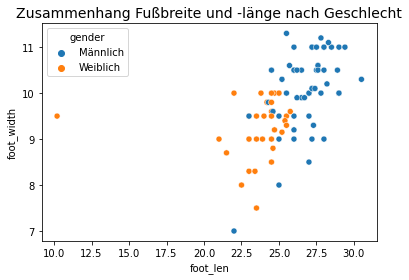

In [233]:
sns.scatterplot(x='foot_len', y='foot_width', data=users, hue='gender')
plt.title("Zusammenhang Fußbreite und -länge nach Geschlecht", fontsize=14)
plt.show()

## shoe_features

In [234]:
shoes = pd.read_csv('./data/shoe_survey.csv')

In [235]:
shoes.isnull().sum()

userid                          0
timestamp                       0
shoe_brand                    402
shoe_model                    402
Modell nicht in der Liste?    557
climb_shoe_size               402
shoe_age                      402
favourite                     405
shoe_vorspann                 402
shoe_downturn                 402
shoe_asymetry                 402
shoe_closing_type             402
climb_style                   402
terrain                       402
rate_fit                      402
rate_comfort                  402
rate_stiffness                402
use_freq                      402
climb_grade                   402
overall_rating                402
dtype: int64

In [236]:
shoes = shoes.dropna(subset=['shoe_brand'])
shoes.reset_index(inplace=True, drop=True)

In [237]:
shoes.head(3)

,userid,timestamp,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,climb_style,terrain,rate_fit,rate_comfort,rate_stiffness,use_freq,climb_grade,overall_rating
0,1,24.02.2021 22:27:44,La Sportiva,La Sportiva - SKWAMA,NaN,39.0,2.0,Ja,Ja,Ja,Nein,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,4.0,4.0,Fortgeschritten (UIAA 7 - 9),5.0
1,2,25.02.2021 08:26:50,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,NaN,37.5,0.7,Ja,Ja,Ja,Ja,Klett,Bouldern,Halle,4.0,4.0,3.0,3.0,Fortgeschritten (UIAA 7 - 9),4.0
2,3,25.02.2021 10:28:25,La Sportiva,La Sportiva - SKWAMA,NaN,42.5,1.0,Ja,Ja,Ja,Ja,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,5.0,5.0,Fortgeschritten (UIAA 7 - 9),5.0


In [238]:
shoes.drop('timestamp', axis=1, inplace=True)

<AxesSubplot:>

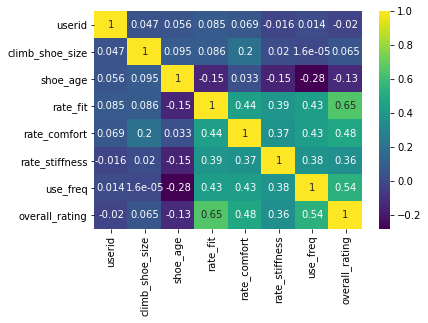

In [239]:
sns.heatmap(shoes.corr(), cmap='viridis', annot=True)

In [240]:
shoes['shoe_model'].value_counts().sort_values(ascending=False).head(10)

Sonstige                        15
La Sportiva - SKWAMA            11
Scarpa - VAPOR V                 8
Ocun - OZONE QC                  7
Five Ten - HIANGLE               5
La Sportiva - OTAKI              5
Red Chili - SPIRIT VCR           5
Scarpa - DRAGO                   5
La Sportiva - SOLUTION WOMAN     4
Scarpa - INSTINCT VS             4
Name: shoe_model, dtype: int64

In [241]:
shoes['shoe_model'].value_counts().sort_values(ascending=False).head(10)

Sonstige                        15
La Sportiva - SKWAMA            11
Scarpa - VAPOR V                 8
Ocun - OZONE QC                  7
Five Ten - HIANGLE               5
La Sportiva - OTAKI              5
Red Chili - SPIRIT VCR           5
Scarpa - DRAGO                   5
La Sportiva - SOLUTION WOMAN     4
Scarpa - INSTINCT VS             4
Name: shoe_model, dtype: int64

<AxesSubplot:xlabel='shoe_brand', ylabel='count'>

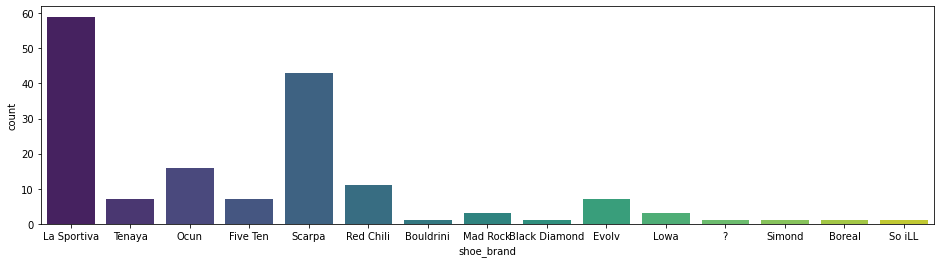

In [242]:
plt.figure(figsize=(16,4))
sns.countplot(x='shoe_brand', data=shoes, palette='viridis')

<AxesSubplot:xlabel='shoe_closing_type', ylabel='count'>

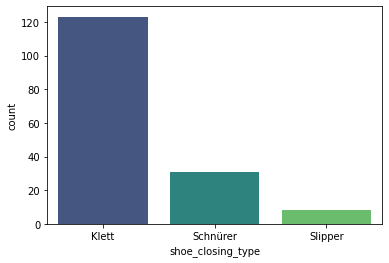

In [243]:
sns.countplot(x='shoe_closing_type', data=shoes, palette='viridis')

In [244]:
shoes['climb_grade'].unique()

array(['Fortgeschritten (UIAA 7 - 9)', 'Anfänger (UIAA < 7)',
       'Profi (UIAA > 9)'], dtype=object)

<AxesSubplot:xlabel='climb_grade', ylabel='count'>

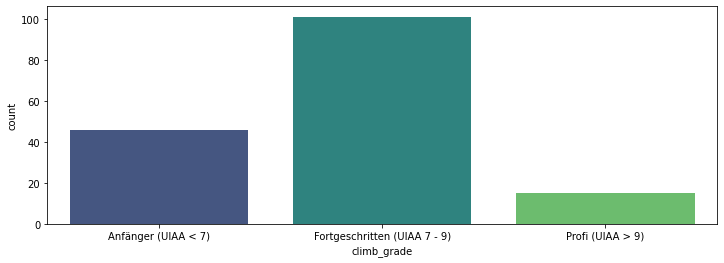

In [245]:
order = ['Anfänger (UIAA < 7)','Fortgeschritten (UIAA 7 - 9)',
       'Profi (UIAA > 9)']
plt.figure(figsize=(12,4))
sns.countplot(x='climb_grade', data=shoes, palette='viridis', order=order)

## Zusammenhänge Körper- & Schuheigenschaften

In [246]:
df = pd.merge(shoes, users, how='left', on=['userid'], suffixes=('_left', '_right'))

In [247]:
df[df['userid'] == 94]

,userid,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,...,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
93,94,Red Chili,Red Chili - SPIRIT VCR,NaN,46.0,5.0,Ja,Nein,Nein,Nein,...,191,92,60,29.4,11.0,Griechischer Fußtyp,"Hallux Valgus, Senkfuß",46.5,NaN,23.0


In [248]:
df.tail(2)

,userid,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,...,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
160,59,Ocun,Ocun - OZONE QC,NaN,42.0,4.0,Nein,Ja,Ja,Ja,...,175,70,27,26.7,9.9,Ägyptischer Fußtyp,Nein,42.5,NaN,6.0
161,4,La Sportiva,La Sportiva - SOLUTION COMP,NaN,43.0,1.0,Ja,Nein,Ja,Ja,...,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      162 non-null    int64  
 1   shoe_brand                  162 non-null    object 
 2   shoe_model                  162 non-null    object 
 3   Modell nicht in der Liste?  7 non-null      object 
 4   climb_shoe_size             162 non-null    float64
 5   shoe_age                    162 non-null    float64
 6   favourite                   159 non-null    object 
 7   shoe_vorspann               162 non-null    object 
 8   shoe_downturn               162 non-null    object 
 9   shoe_asymetry               162 non-null    object 
 10  shoe_closing_type           162 non-null    object 
 11  climb_style                 162 non-null    object 
 12  terrain                     162 non-null    object 
 13  rate_fit                    162 non

In [250]:
df.isnull().sum()

userid                          0
shoe_brand                      0
shoe_model                      0
Modell nicht in der Liste?    155
climb_shoe_size                 0
shoe_age                        0
favourite                       3
shoe_vorspann                   0
shoe_downturn                   0
shoe_asymetry                   0
shoe_closing_type               0
climb_style                     0
terrain                         0
rate_fit                        0
rate_comfort                    0
rate_stiffness                  0
use_freq                        0
climb_grade                     0
overall_rating                  0
gender                          0
height                          0
weight                          0
age                             0
foot_len                        0
foot_width                      0
foot_family                     0
foot_deform                     0
street_shoe_size                0
fav_sneaker_model              24
exp           

In [251]:
df.head(3)

,userid,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,...,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
0,1,La Sportiva,La Sportiva - SKWAMA,NaN,39.0,2.0,Ja,Ja,Ja,Nein,...,168,61,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,Vans Authentic,4.0
1,2,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,NaN,37.5,0.7,Ja,Ja,Ja,Ja,...,168,63,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,Adidas cloudfoam,3.0
2,3,La Sportiva,La Sportiva - SKWAMA,NaN,42.5,1.0,Ja,Ja,Ja,Ja,...,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0


<AxesSubplot:>

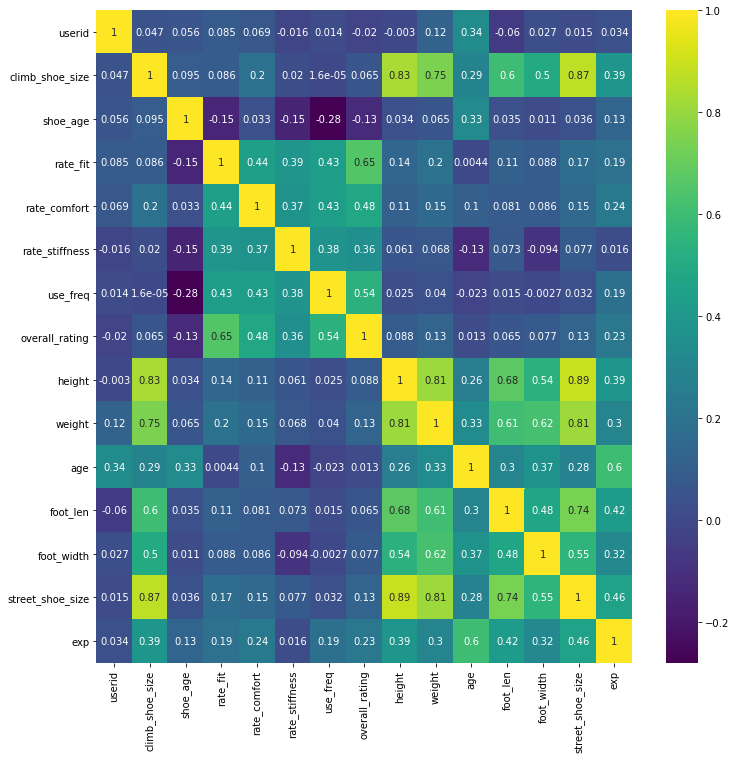

In [252]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

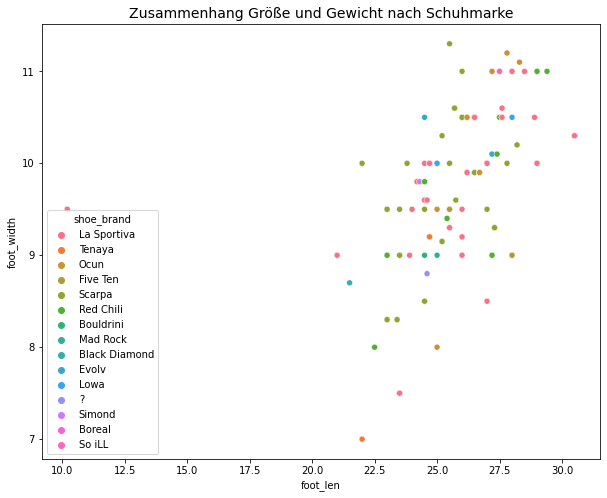

In [253]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='foot_len', y='foot_width', data=df, hue='shoe_brand')

plt.title("Zusammenhang Größe und Gewicht nach Schuhmarke", fontsize=14)
plt.show()

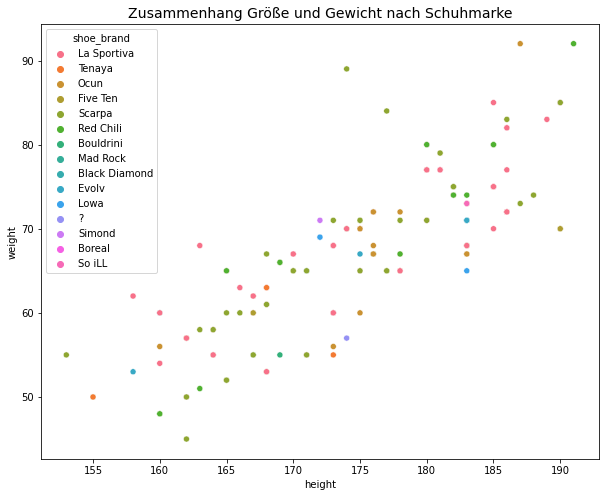

In [254]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='height', y='weight', data=df, hue='shoe_brand')
plt.title("Zusammenhang Größe und Gewicht nach Schuhmarke", fontsize=14)
plt.show()

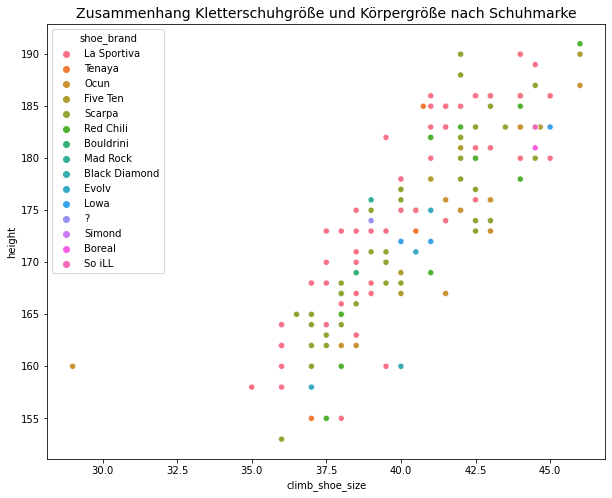

In [255]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='climb_shoe_size', y='height', data=df, hue='shoe_brand')
plt.title("Zusammenhang Kletterschuhgröße und Körpergröße nach Schuhmarke", fontsize=14)
plt.show()

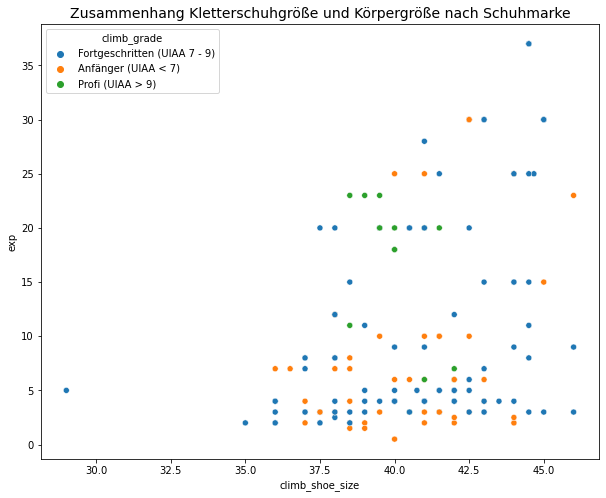

In [256]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='climb_shoe_size', y='exp', data=df, hue='climb_grade')
plt.title("Zusammenhang Kletterschuhgröße und Körpergröße nach Schuhmarke", fontsize=14)
plt.show()

# Feature Engineering

## Fehlende Werte

In [257]:
df.isnull().any()

userid                        False
shoe_brand                    False
shoe_model                    False
Modell nicht in der Liste?     True
climb_shoe_size               False
shoe_age                      False
favourite                      True
shoe_vorspann                 False
shoe_downturn                 False
shoe_asymetry                 False
shoe_closing_type             False
climb_style                   False
terrain                       False
rate_fit                      False
rate_comfort                  False
rate_stiffness                False
use_freq                      False
climb_grade                   False
overall_rating                False
gender                        False
height                        False
weight                        False
age                           False
foot_len                      False
foot_width                    False
foot_family                   False
foot_deform                   False
street_shoe_size            

In [258]:
df.drop('fav_sneaker_model',axis=1, inplace=True)

In [259]:
df['favourite'] = df['favourite'].fillna('Ja')

In [260]:
df.isnull().any()

userid                        False
shoe_brand                    False
shoe_model                    False
Modell nicht in der Liste?     True
climb_shoe_size               False
shoe_age                      False
favourite                     False
shoe_vorspann                 False
shoe_downturn                 False
shoe_asymetry                 False
shoe_closing_type             False
climb_style                   False
terrain                       False
rate_fit                      False
rate_comfort                  False
rate_stiffness                False
use_freq                      False
climb_grade                   False
overall_rating                False
gender                        False
height                        False
weight                        False
age                           False
foot_len                      False
foot_width                    False
foot_family                   False
foot_deform                   False
street_shoe_size            

In [261]:
df[df['Modell nicht in der Liste?'].notna() == True]

,userid,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,...,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,exp
61,62,Five Ten,Sonstige,Diamond (ca. 22 Jahre alt :),40.0,22.0,Ja,Nein,Nein,Nein,...,Weiblich,169,66,54,25.4,9.4,Römischer Fußtyp,"Nein, abgeflachtes Quergewölbe, aber noch kein...",40.0,25.0
77,78,Boreal,Sonstige,Satori,44.5,1.5,Ja,Ja,Ja,Ja,...,Männlich,181,77,34,27.6,10.5,Ägyptischer Fußtyp,Senkfuß,44.5,3.0
86,87,Evolv,Sonstige,Evolve Shaman 2,44.5,2.0,Ja,Ja,Ja,Ja,...,Männlich,183,71,54,27.2,10.1,Römischer Fußtyp,"Nein, Knickfuß",44.5,37.0
88,89,Evolv,Sonstige,Evolve Shaman 2,44.5,2.0,Ja,Ja,Ja,Ja,...,Männlich,183,71,54,27.2,10.1,Römischer Fußtyp,"Nein, Knickfuß",44.5,37.0
125,60,Red Chili,Sonstige,AMP,38.0,2.0,Ja,Nein,Nein,Nein,...,Weiblich,165,65,40,24.5,9.8,Griechischer Fußtyp,Nein,39.0,12.0
139,87,Evolv,Sonstige,Shaman 2,44.5,2.0,Ja,Ja,Ja,Ja,...,Männlich,183,71,54,27.2,10.1,Römischer Fußtyp,"Nein, Knickfuß",44.5,37.0
140,89,Evolv,Sonstige,Shaman 2,44.5,2.0,Ja,Ja,Ja,Ja,...,Männlich,183,71,54,27.2,10.1,Römischer Fußtyp,"Nein, Knickfuß",44.5,37.0


In [262]:
for i in df[df['Modell nicht in der Liste?'].notna() == True].index:
    df.at[i, 'shoe_model'] = df['Modell nicht in der Liste?'].iloc[i]

df[df['Modell nicht in der Liste?'].notna() == True]

,userid,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,...,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,exp
61,62,Five Ten,Diamond (ca. 22 Jahre alt :),Diamond (ca. 22 Jahre alt :),40.0,22.0,Ja,Nein,Nein,Nein,...,Weiblich,169,66,54,25.4,9.4,Römischer Fußtyp,"Nein, abgeflachtes Quergewölbe, aber noch kein...",40.0,25.0
77,78,Boreal,Satori,Satori,44.5,1.5,Ja,Ja,Ja,Ja,...,Männlich,181,77,34,27.6,10.5,Ägyptischer Fußtyp,Senkfuß,44.5,3.0
86,87,Evolv,Evolve Shaman 2,Evolve Shaman 2,44.5,2.0,Ja,Ja,Ja,Ja,...,Männlich,183,71,54,27.2,10.1,Römischer Fußtyp,"Nein, Knickfuß",44.5,37.0
88,89,Evolv,Evolve Shaman 2,Evolve Shaman 2,44.5,2.0,Ja,Ja,Ja,Ja,...,Männlich,183,71,54,27.2,10.1,Römischer Fußtyp,"Nein, Knickfuß",44.5,37.0
125,60,Red Chili,AMP,AMP,38.0,2.0,Ja,Nein,Nein,Nein,...,Weiblich,165,65,40,24.5,9.8,Griechischer Fußtyp,Nein,39.0,12.0
139,87,Evolv,Shaman 2,Shaman 2,44.5,2.0,Ja,Ja,Ja,Ja,...,Männlich,183,71,54,27.2,10.1,Römischer Fußtyp,"Nein, Knickfuß",44.5,37.0
140,89,Evolv,Shaman 2,Shaman 2,44.5,2.0,Ja,Ja,Ja,Ja,...,Männlich,183,71,54,27.2,10.1,Römischer Fußtyp,"Nein, Knickfuß",44.5,37.0


In [263]:
df.drop('Modell nicht in der Liste?',axis=1,inplace=True)

In [264]:
df.isnull().any()

userid               False
shoe_brand           False
shoe_model           False
climb_shoe_size      False
shoe_age             False
favourite            False
shoe_vorspann        False
shoe_downturn        False
shoe_asymetry        False
shoe_closing_type    False
climb_style          False
terrain              False
rate_fit             False
rate_comfort         False
rate_stiffness       False
use_freq             False
climb_grade          False
overall_rating       False
gender               False
height               False
weight               False
age                  False
foot_len             False
foot_width           False
foot_family          False
foot_deform          False
street_shoe_size     False
exp                  False
dtype: bool

In [265]:
df.select_dtypes(['object']).columns

Index(['shoe_brand', 'shoe_model', 'favourite', 'shoe_vorspann',
       'shoe_downturn', 'shoe_asymetry', 'shoe_closing_type', 'climb_style',
       'terrain', 'climb_grade', 'gender', 'foot_family', 'foot_deform'],
      dtype='object')

In [266]:
df['shoe_model'].value_counts()

La Sportiva - SKWAMA      11
Sonstige                   8
Scarpa - VAPOR V           8
Ocun - OZONE QC            7
Scarpa - DRAGO             5
                          ..
Simond - ROCK+             1
Evolv - DEFY LACE          1
Scarpa - ARPIA WMN         1
La Sportiva - MIURA VS     1
Ocun - PEARL               1
Name: shoe_model, Length: 72, dtype: int64

In [267]:
df['shoe_brand'].value_counts()

La Sportiva      59
Scarpa           43
Ocun             16
Red Chili        11
Evolv             7
Tenaya            7
Five Ten          7
Lowa              3
Mad Rock          3
Simond            1
Bouldrini         1
Black Diamond     1
Boreal            1
?                 1
So iLL            1
Name: shoe_brand, dtype: int64

In [268]:
df[df['shoe_brand'] == '?']

,userid,shoe_brand,shoe_model,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,...,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,exp
55,56,?,Sonstige,39.0,4.0,Nein,Nein,Ja,Nein,Schnürer,...,Weiblich,174,57,33,24.6,8.8,Römischer Fußtyp,"Nein, Spreizfuß",40.5,2.0


In [269]:
df.drop('shoe_brand',axis=1,inplace=True)

In [270]:
df['shoe_model'][df['shoe_model'] == 'Sonstige'].index

Int64Index([18, 27, 31, 54, 55, 98, 114, 119], dtype='int64')

In [271]:
df.drop([18, 27, 31, 54, 55, 98, 114, 119],inplace=True)

In [272]:
df.select_dtypes(['object']).columns

Index(['shoe_model', 'favourite', 'shoe_vorspann', 'shoe_downturn',
       'shoe_asymetry', 'shoe_closing_type', 'climb_style', 'terrain',
       'climb_grade', 'gender', 'foot_family', 'foot_deform'],
      dtype='object')

In [273]:
df['climb_style'].value_counts()

Sportklettern, Bouldern                    65
Bouldern                                   49
Sportklettern, Bouldern, Mehrseillängen    18
Sportklettern, Mehrseillängen              10
Sportklettern                               6
Mehrseillängen                              4
Bouldern, Mehrseillängen                    2
Name: climb_style, dtype: int64

In [274]:
df['climb_style'].unique()

array(['Sportklettern, Bouldern', 'Bouldern',
       'Sportklettern, Bouldern, Mehrseillängen',
       'Bouldern, Mehrseillängen', 'Mehrseillängen', 'Sportklettern',
       'Sportklettern, Mehrseillängen'], dtype=object)

In [275]:
def strip_list(liste):
    stripped = []
    
    for n in liste:
        stripped.append(n.strip())
    
    return stripped

In [276]:
styles = ['Sportklettern', 'Bouldern', 'Mehrseillängen']
for style in styles:
    df[style.lower().split()[0]] = df.apply(lambda row: 1 if style in strip_list(row.climb_style.split(',')) else 0, axis=1)
df.head()

,userid,shoe_model,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,climb_style,...,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,exp,sportklettern,bouldern,mehrseillängen
0,1,La Sportiva - SKWAMA,39.0,2.0,Ja,Ja,Ja,Nein,Klett,"Sportklettern, Bouldern",...,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,4.0,1,1,0
1,2,La Sportiva - SOLUTION COMP WOMAN,37.5,0.7,Ja,Ja,Ja,Ja,Klett,Bouldern,...,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,3.0,0,1,0
2,3,La Sportiva - SKWAMA,42.5,1.0,Ja,Ja,Ja,Ja,Klett,"Sportklettern, Bouldern",...,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,30.0,1,1,0
3,4,La Sportiva - SKWAMA,42.5,1.0,Ja,Ja,Ja,Ja,Klett,"Sportklettern, Bouldern",...,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,30.0,1,1,0
4,5,Tenaya - OASI,41.0,2.0,Ja,Ja,Ja,Ja,Klett,"Sportklettern, Bouldern",...,33,27.0,10.0,Römischer Fußtyp,Hallux Valgus,42.0,3.0,1,1,0


In [277]:
df.drop('climb_style',axis=1,inplace=True)

In [278]:
df.select_dtypes(['object']).columns

Index(['shoe_model', 'favourite', 'shoe_vorspann', 'shoe_downturn',
       'shoe_asymetry', 'shoe_closing_type', 'terrain', 'climb_grade',
       'gender', 'foot_family', 'foot_deform'],
      dtype='object')

In [279]:
df['shoe_closing_type'].value_counts()

Klett       118
Schnürer     29
Slipper       7
Name: shoe_closing_type, dtype: int64

In [280]:
df['terrain'].value_counts()

Beides     93
Halle      44
Outdoor    17
Name: terrain, dtype: int64

In [281]:
df['halle'] = df['terrain'].map(lambda row: 1 if row in ['Halle', 'Beides'] else 0)

In [282]:
df['outdoor'] = df['terrain'].map(lambda row: 1 if row in ['Outdoor', 'Beides'] else 0)

In [283]:
df.drop('terrain',axis=1,inplace=True)

In [284]:
df.select_dtypes(['object']).columns

Index(['shoe_model', 'favourite', 'shoe_vorspann', 'shoe_downturn',
       'shoe_asymetry', 'shoe_closing_type', 'climb_grade', 'gender',
       'foot_family', 'foot_deform'],
      dtype='object')

In [285]:
df['climb_grade'].value_counts()

Fortgeschritten (UIAA 7 - 9)    97
Anfänger (UIAA < 7)             42
Profi (UIAA > 9)                15
Name: climb_grade, dtype: int64

In [286]:
df['beginner'] = df['climb_grade'].map(lambda row: 1 if row in ['Anfänger (UIAA < 7)'] else 0)
df['advanced'] = df['climb_grade'].map(lambda row: 1 if row in ['Fortgeschritten (UIAA 7 - 9)'] else 0)
df['pro'] = df['climb_grade'].map(lambda row: 1 if row in ['Profi (UIAA > 9)'] else 0)

In [287]:
df.head()

,userid,shoe_model,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,rate_fit,...,street_shoe_size,exp,sportklettern,bouldern,mehrseillängen,halle,outdoor,beginner,advanced,pro
0,1,La Sportiva - SKWAMA,39.0,2.0,Ja,Ja,Ja,Nein,Klett,5.0,...,41.5,4.0,1,1,0,1,1,0,1,0
1,2,La Sportiva - SOLUTION COMP WOMAN,37.5,0.7,Ja,Ja,Ja,Ja,Klett,4.0,...,38.5,3.0,0,1,0,1,0,0,1,0
2,3,La Sportiva - SKWAMA,42.5,1.0,Ja,Ja,Ja,Ja,Klett,5.0,...,46.0,30.0,1,1,0,1,1,0,1,0
3,4,La Sportiva - SKWAMA,42.5,1.0,Ja,Ja,Ja,Ja,Klett,5.0,...,46.0,30.0,1,1,0,1,1,0,1,0
4,5,Tenaya - OASI,41.0,2.0,Ja,Ja,Ja,Ja,Klett,4.0,...,42.0,3.0,1,1,0,1,0,1,0,0


In [288]:
df['foot_deform'].value_counts()

Nein                                                        80
Hallux Valgus                                               13
Senkfuß                                                     11
Spreizfuß                                                   10
Plattfuß                                                     5
Knickfuß                                                     4
Nein, Knickfuß                                               4
Plattfuß, Spreizfuß                                          3
Hallux Valgus, Senkfuß                                       3
Nein, Spreizfuß                                              2
Plattfuß, Senkfuß                                            2
Hallux Valgus, Hohlfuß                                       2
Fersenbein                                                   2
Nein, Hallux Valgus, Senkfuß                                 2
Nein, Hallux Valgus                                          2
Nein, abgeflachtes Quergewölbe, aber noch kein Spreizfu

In [289]:
df[df['foot_deform'] == 'Nein, abgeflachtes Quergewölbe, aber noch kein Spreizfuß']

,userid,shoe_model,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,rate_fit,...,street_shoe_size,exp,sportklettern,bouldern,mehrseillängen,halle,outdoor,beginner,advanced,pro
61,62,Diamond (ca. 22 Jahre alt :),40.0,22.0,Ja,Nein,Nein,Nein,Schnürer,5.0,...,40.0,25.0,1,0,1,1,1,1,0,0
127,62,Red Chili - SPIRIT LV VCR,41.0,13.0,Nein,Nein,Nein,Nein,Klett,3.0,...,40.0,25.0,1,0,1,1,1,1,0,0


In [290]:
df.at[61,'foot_deform'] = 'Nein'
df.at[127,'foot_deform'] = 'Nein'

In [291]:
df['foot_deform'].value_counts()

Nein                                           82
Hallux Valgus                                  13
Senkfuß                                        11
Spreizfuß                                      10
Plattfuß                                        5
Nein, Knickfuß                                  4
Knickfuß                                        4
Plattfuß, Spreizfuß                             3
Hallux Valgus, Senkfuß                          3
Nein, Spreizfuß                                 2
Plattfuß, Senkfuß                               2
Hallux Valgus, Hohlfuß                          2
Fersenbein                                      2
Nein, Hallux Valgus, Senkfuß                    2
Nein, Hallux Valgus                             2
Hohlfuß                                         2
Hallux Valgus, Plattfuß, Senkfuß, Spreizfuß     1
Senkfuß, Spreizfuß                              1
Nein, Senkfuß                                   1
Hallux Valgus, Plattfuß                         1


In [292]:
df[df['foot_deform'] == 'Hallux Valgus, Senkfuß']

,userid,shoe_model,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,rate_fit,...,street_shoe_size,exp,sportklettern,bouldern,mehrseillängen,halle,outdoor,beginner,advanced,pro
11,12,Scarpa - INSTINCT VSR,40.0,1.0,Nein,Ja,Ja,Nein,Klett,5.0,...,40.5,18.0,1,1,0,1,1,0,0,1
93,94,Red Chili - SPIRIT VCR,46.0,5.0,Ja,Nein,Nein,Nein,Klett,4.0,...,46.5,23.0,1,0,1,1,1,1,0,0
100,12,Scarpa - INSTINCT VS,40.0,1.0,Ja,Ja,Ja,Nein,Klett,5.0,...,40.5,18.0,1,1,0,1,1,0,0,1


In [293]:
def strip_list(liste):
    stripped = []
    
    for n in liste:
        stripped.append(n.strip())
    
    return stripped

deformations = ['Hallux Valgus', 'Senkfuß','Spreizfuß','Plattfuß', 'Hohlfuß','Knickfuß', 'Fersenbein']

for deform in deformations:
    df[deform.lower().split()[0]] = df.apply(lambda row: 1 if deform in strip_list(row.foot_deform.split(',')) else 0, axis=1)

df.head(3)

,userid,shoe_model,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,rate_fit,...,beginner,advanced,pro,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,fersenbein
0,1,La Sportiva - SKWAMA,39.0,2.0,Ja,Ja,Ja,Nein,Klett,5.0,...,0,1,0,0,0,0,0,0,0,0
1,2,La Sportiva - SOLUTION COMP WOMAN,37.5,0.7,Ja,Ja,Ja,Ja,Klett,4.0,...,0,1,0,1,0,0,0,0,0,0
2,3,La Sportiva - SKWAMA,42.5,1.0,Ja,Ja,Ja,Ja,Klett,5.0,...,0,1,0,0,0,0,0,0,0,0


In [294]:
df.drop(['foot_deform', 'climb_grade'],axis=1,inplace=True)

In [295]:
df.select_dtypes(['object']).columns

Index(['shoe_model', 'favourite', 'shoe_vorspann', 'shoe_downturn',
       'shoe_asymetry', 'shoe_closing_type', 'gender', 'foot_family'],
      dtype='object')

In [296]:
df['favourite'] = df['favourite'].map(lambda row: 1 if row in ['Ja'] else 0)

In [297]:
df.select_dtypes(['object']).columns

Index(['shoe_model', 'shoe_vorspann', 'shoe_downturn', 'shoe_asymetry',
       'shoe_closing_type', 'gender', 'foot_family'],
      dtype='object')

In [299]:
df['foot_family'].value_counts()

Ägyptischer Fußtyp     71
Römischer Fußtyp       47
Griechischer Fußtyp    36
Name: foot_family, dtype: int64

In [300]:
df['egypt'] = df['foot_family'].map(lambda row: 1 if row in ['Ägyptischer Fußtyp'] else 0)
df['rome'] = df['foot_family'].map(lambda row: 1 if row in ['Römischer Fußtyp'] else 0)
df['greek'] = df['foot_family'].map(lambda row: 1 if row in ['Griechischer Fußtyp'] else 0)
df['shoe_vorspann'] = df['shoe_vorspann'].map(lambda row: 1 if row in ['Ja'] else 0)
df['shoe_downturn'] = df['shoe_downturn'].map(lambda row: 1 if row in ['Ja'] else 0)
df['shoe_asymetry'] = df['shoe_asymetry'].map(lambda row: 1 if row in ['Ja'] else 0)

df.drop('foot_family',axis=1, inplace=True)
df.head()

,userid,shoe_model,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,rate_fit,...,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,fersenbein,egypt,rome,greek
0,1,La Sportiva - SKWAMA,39.0,2.0,1,1,1,0,Klett,5.0,...,0,0,0,0,0,0,0,1,0,0
1,2,La Sportiva - SOLUTION COMP WOMAN,37.5,0.7,1,1,1,1,Klett,4.0,...,1,0,0,0,0,0,0,0,1,0
2,3,La Sportiva - SKWAMA,42.5,1.0,1,1,1,1,Klett,5.0,...,0,0,0,0,0,0,0,0,0,1
3,4,La Sportiva - SKWAMA,42.5,1.0,1,1,1,1,Klett,5.0,...,0,0,0,0,0,0,0,0,0,1
4,5,Tenaya - OASI,41.0,2.0,1,1,1,1,Klett,4.0,...,1,0,0,0,0,0,0,0,1,0


In [301]:
dummies = pd.get_dummies(data=df, columns=['shoe_model','shoe_closing_type', 'gender'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

In [302]:
df.head()

,userid,shoe_model,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,rate_fit,...,shoe_model_Simond - ROCK+,shoe_model_So iLL - ZERO PRO,shoe_model_Tenaya - IATI,shoe_model_Tenaya - MASTIA,shoe_model_Tenaya - MUNDAKA,shoe_model_Tenaya - OASI,shoe_model_Tenaya - OASI LV,shoe_closing_type_Schnürer,shoe_closing_type_Slipper,gender_Weiblich
0,1,La Sportiva - SKWAMA,39.0,2.0,1,1,1,0,Klett,5.0,...,0,0,0,0,0,0,0,0,0,0
1,2,La Sportiva - SOLUTION COMP WOMAN,37.5,0.7,1,1,1,1,Klett,4.0,...,0,0,0,0,0,0,0,0,0,1
2,3,La Sportiva - SKWAMA,42.5,1.0,1,1,1,1,Klett,5.0,...,0,0,0,0,0,0,0,0,0,0
3,4,La Sportiva - SKWAMA,42.5,1.0,1,1,1,1,Klett,5.0,...,0,0,0,0,0,0,0,0,0,0
4,5,Tenaya - OASI,41.0,2.0,1,1,1,1,Klett,4.0,...,0,0,0,0,0,1,0,0,0,0


In [303]:
df.select_dtypes(['object']).columns

Index(['shoe_model', 'shoe_closing_type', 'gender'], dtype='object')

In [304]:
df.drop(['shoe_model','shoe_closing_type','gender'],axis=1, inplace=True)

In [305]:
df.shape

(154, 147)

# Klassifizierung

## K-Nearest Neighbor

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

## Logistische Regression

# Multiklassen Klassifizierung

### Ziel: Mehrere Outputs vorhersagen

### Grundprinzipien:
One vs. All -> Wenn eine Klasse 1 ist, sind alle anderen 0<br>
One vs. One -> Pärchenweiser Vergleich aller Outputklassen 



## Logistische Regression

## Neuronales Netz 

Output Aktivirungsfunktion: Sigmoid

In [82]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [149]:
X = df.drop('userid',axis=1).values
y = df_y.values

print(len(y))

94


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [151]:
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
X_train.shape

(65, 17)

In [153]:
X_test.shape

(29, 17)

In [154]:
y_train.shape

(65, 66)

In [155]:
y_test.shape

(29, 66)

In [169]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [177]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(units=17, activation='relu'))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=66, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [180]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 0.00% (0.00%)


In [167]:
#model.fit(x=X_train, 
#          y=y_train, 
#          epochs=100,
#          batch_size=10,
#          validation_data=(X_test, y_test), verbose=1
#          )

In [171]:
#model_loss = pd.DataFrame(model.history.history)

In [172]:
#model_loss.plot()